### Codio Activity 14.1: Decision Trees with `sklearn`

This activity introduces using the `DecisionTreeClassifier` from the `sklearn.tree` module.  You will build some basic models and explore hyperparameters available.  Using the results of the model, you will explore decision boundaries determined by the estimator. 

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

from sklearn import set_config

set_config("diagram")

### The Data

For this activity, you will again use the `penguins` data from seaborn.  You will target the two most important features to determining between `Adelie` and `Gentoo`. 

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
X = penguins.select_dtypes('float')
y = penguins.species

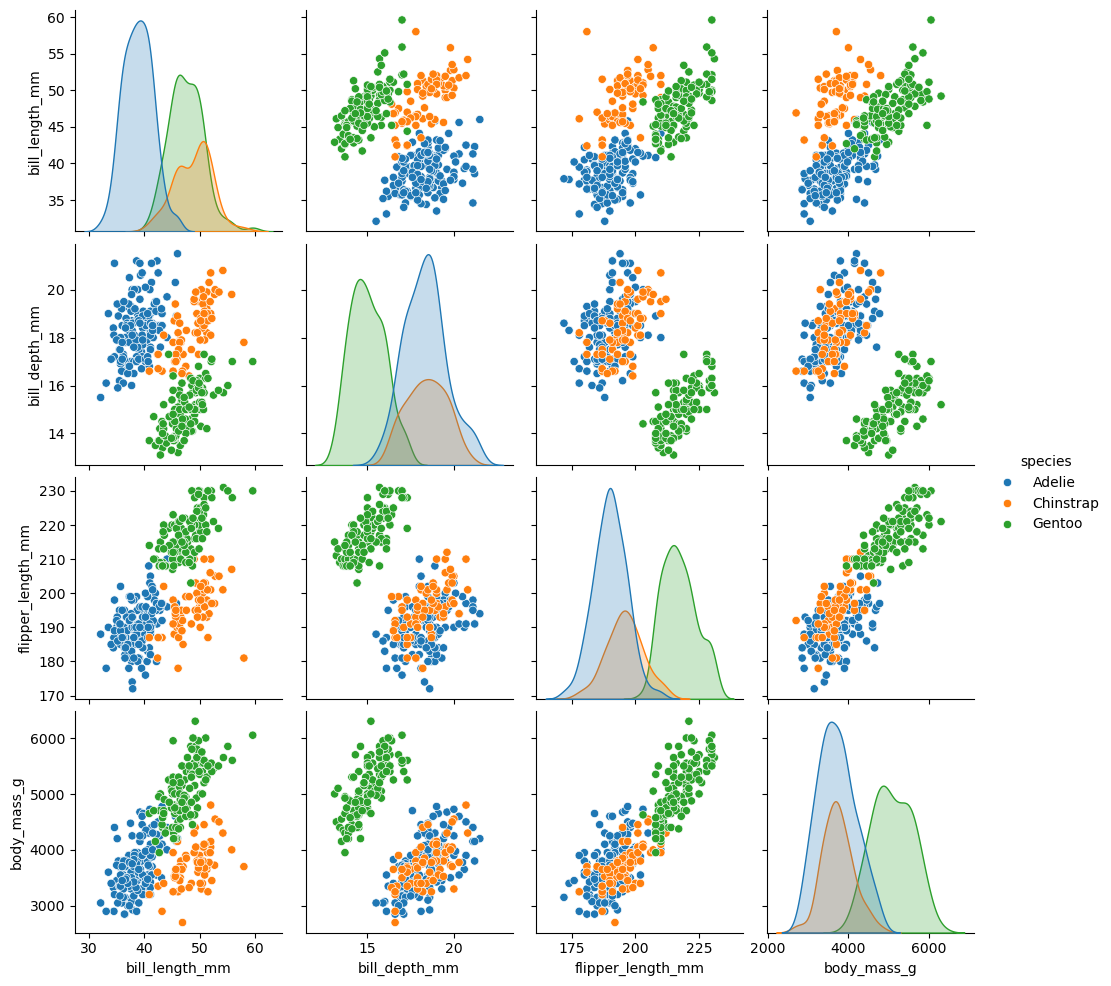

In [5]:
sns.pairplot(data = penguins, hue = 'species')

### Problem 1

#### Fitting a model

To being, build a `DecisionTreeClassifier` with the parameter `max_depth = 1`.  Fit the model on the training data and assign it to the variable `dtree` below.


In [6]:
dtree = DecisionTreeClassifier(max_depth = 1).fit(X,y)
dtree

DecisionTreeClassifier(max_depth=1)

In [7]:
dtree.max_depth

1

### Problem 2

#### Examining the Decision

To examine a basic text representation of the fit tree, use the `export_text` function and set the argument `feature_names = list(X.columns)`.  

In [9]:
depth_1 = export_text(dtree, feature_names = list(X.columns))
depth_1

'|--- flipper_length_mm <= 206.50\n|   |--- class: Adelie\n|--- flipper_length_mm >  206.50\n|   |--- class: Gentoo\n'

### Problem 3

#### Two Features

**10 Points**

Now, to make it simpler to plot the boundaries the data is subset to `flipper_length_mm` and `bill_length_mm`.  Below, fit the model and assign the results of the tree with `export_text()` as `tree2` below.  Try replicating the image below using the information from the tree. (vertical and horizontal lines represent decision boundaries of tree)

<center>
    <img src = 'codio_14_1_solution/images/p3.png' />
</center>



In [10]:
X2 = X[['flipper_length_mm', 'bill_length_mm']]
dtree = ''
tree2 = ''

In [11]:
dtree = DecisionTreeClassifier(max_depth =2).fit(X2,y)
dtree

DecisionTreeClassifier(max_depth=2)

In [12]:
tree2 = export_text(dtree, feature_names = list(X2.columns))
tree2

'|--- flipper_length_mm <= 206.50\n|   |--- bill_length_mm <= 43.35\n|   |   |--- class: Adelie\n|   |--- bill_length_mm >  43.35\n|   |   |--- class: Chinstrap\n|--- flipper_length_mm >  206.50\n|   |--- bill_length_mm <= 40.85\n|   |   |--- class: Adelie\n|   |--- bill_length_mm >  40.85\n|   |   |--- class: Gentoo\n'

### Problem 4

#### Evaluating the tree

Again, the default metric of the classifier is accuracy.  Evaluate the accuracy of the estimator `DecisionTreeClassifier` and assign as a float to `acc_depth_2` below.  As you see there are a few points misclassified in the image of the decision boundaries.

In [13]:
acc_depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X2, y).score(X2,y)
acc_depth_2

0.9519519519519519

### Problem 5

#### A Deeper Tree

Finally, consider a tree with `max_depth = 3`.  Print the results and and use them to decide a prediction for the following penguin:

| flipper_length_mm | bill_length_mm |
| ----------------- | -------------  |
| 209 | 41.2 |

Assign your results as a string `Adelie`, `Chinstrap`, or `Gentoo` to `prediction` below.

In [15]:
X3 = X[['flipper_length_mm', 'bill_length_mm']]


In [16]:
dtree3 = DecisionTreeClassifier(max_depth = 3).fit(X3,y)
dtree3

DecisionTreeClassifier(max_depth=3)

In [18]:
prediction = 'Gentoo'

### Codio Activity 14.2:  Visualizing a Decision Tree

This activity focuses on visualizing the results of a `DecisionTreeClassifier` using the `plot_tree` function from `sklearn`. Behind the visualization lies the `graphviz` library, and if further customization is desired you can implement a graph visualization using the Python implementation of `graphviz` [here](https://pypi.org/project/graphviz/).

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

In [30]:
default = pd.read_csv('codio_14_2_solution/data/Default.csv',skiprows=1).set_index("ID")

In [31]:
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
X = default.drop('default payment next month', axis = 1)

In [33]:
y = default['default payment next month']

### Problem 1

#### Fitting a model

To being, build a `DecisionTreeClassifier` with the parameter `max_depth = 1`.  Fit the model on the training data and assign it to the variable `tree1` below.  Then, pass the `tree1` object to the `plot_tree` function with no additional arguments below.  Assign your results to `tree1_plot` below.

In [34]:
tree1 = DecisionTreeClassifier(max_depth = 1).fit(X,y)
tree1

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[5] <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.25, 0.25, 'gini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.424\nsamples = 3130\nvalue = [953.0, 2177.0]'),
 Text(0.625, 0.5, '  False')]

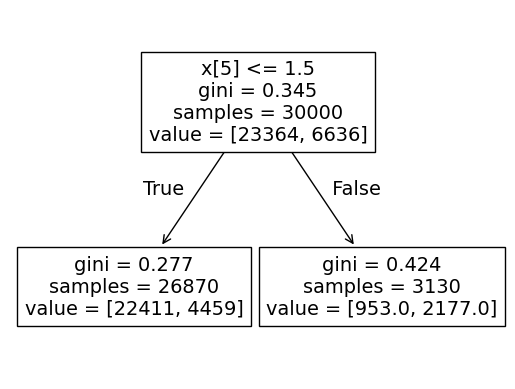

In [35]:
tree1_plot = plot_tree(tree1)
tree1_plot

### Problem 2

#### Adding Feature Names

The visualization above notes that `X[5] <= 1.5`.  To instead have the feature name displayed, add the argument `feature_names` and list the columns from your data `X`.  Assign your new visualization to `tree1_withnames` below. 

<center>
    <img src = 'codio_14_2_solution/images/tree1.png' />
</center>

[Text(0.5, 0.75, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.25, 0.25, 'gini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.424\nsamples = 3130\nvalue = [953.0, 2177.0]'),
 Text(0.625, 0.5, '  False')]

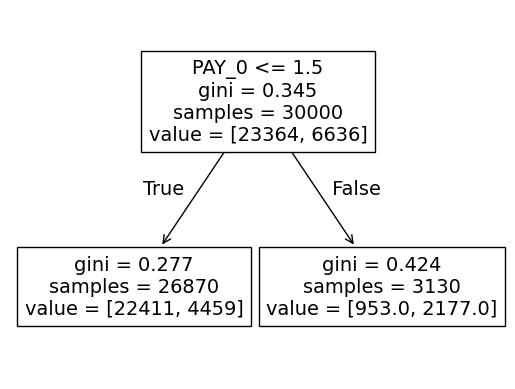

In [37]:
tree1_withnames = plot_tree(tree1, feature_names = list(X.columns))
tree1_withnames

### Problem 3

#### Coloring the Nodes

The nodes can be colored to differentiate between the categories within.  Add the argument `filled = True` to color the nodes and `feature_names = list(X.columns)`.  Assign your tree with named and colored nodes to `tree1_colored` below.


[Text(0.5, 0.75, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.25, 0.25, 'gini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.424\nsamples = 3130\nvalue = [953.0, 2177.0]'),
 Text(0.625, 0.5, '  False')]

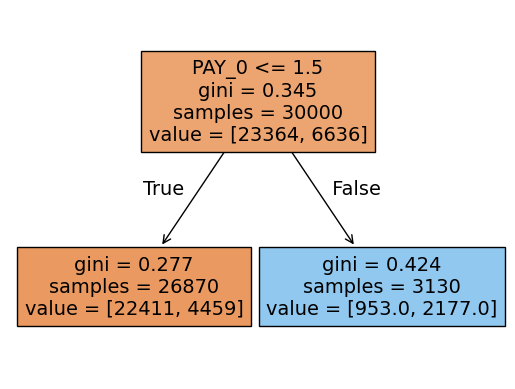

In [38]:
tree1_colored = plot_tree(tree1, feature_names = list(X.columns), filled = True)
tree1_colored

### Problem 4

#### A Deeper Tree

Now, build a `DecisionTreeClassifier` with `max_depth = 5` setting as `tree2`.  Visualize the tree below with the feature names and nodes colored. Assign the results to `deep_tree` below.  

In [39]:
tree2 = DecisionTreeClassifier(max_depth = 5).fit(X,y)
tree2

DecisionTreeClassifier(max_depth=5)

[Text(0.50625, 0.9166666666666666, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.26666666666666666, 0.75, 'PAY_2 <= 1.5\ngini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.38645833333333335, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'PAY_AMT3 <= 678.5\ngini = 0.245\nsamples = 24599\nvalue = [21085, 3514]'),
 Text(0.06666666666666667, 0.4166666666666667, 'BILL_AMT1 <= 530.0\ngini = 0.339\nsamples = 6776\nvalue = [5312, 1464]'),
 Text(0.03333333333333333, 0.25, 'PAY_AMT4 <= 3.5\ngini = 0.4\nsamples = 2664\nvalue = [1929, 735]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.427\nsamples = 1645\nvalue = [1136.0, 509.0]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.345\nsamples = 1019\nvalue = [793, 226]'),
 Text(0.1, 0.25, 'PAY_4 <= 1.0\ngini = 0.292\nsamples = 4112\nvalue = [3383, 729]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.266\nsamples = 3381\nvalue = [2846, 535]'),
 Text

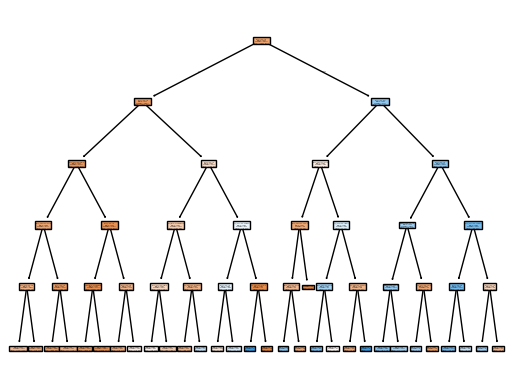

In [40]:
deep_tree = plot_tree(tree2, feature_names = list(X.columns), filled = True)
deep_tree

#### A more readable output

As you can see, by default even a depth 5 tree is difficult to read.  To change this, you can plot the tree to a `matplotlib.axes` object with different figuresize.  Below, the same tree is plotted with a larger figure size as an example.  Despite changing this however, you should note that a simpler tree is much easier to visualize and interpret the rules.

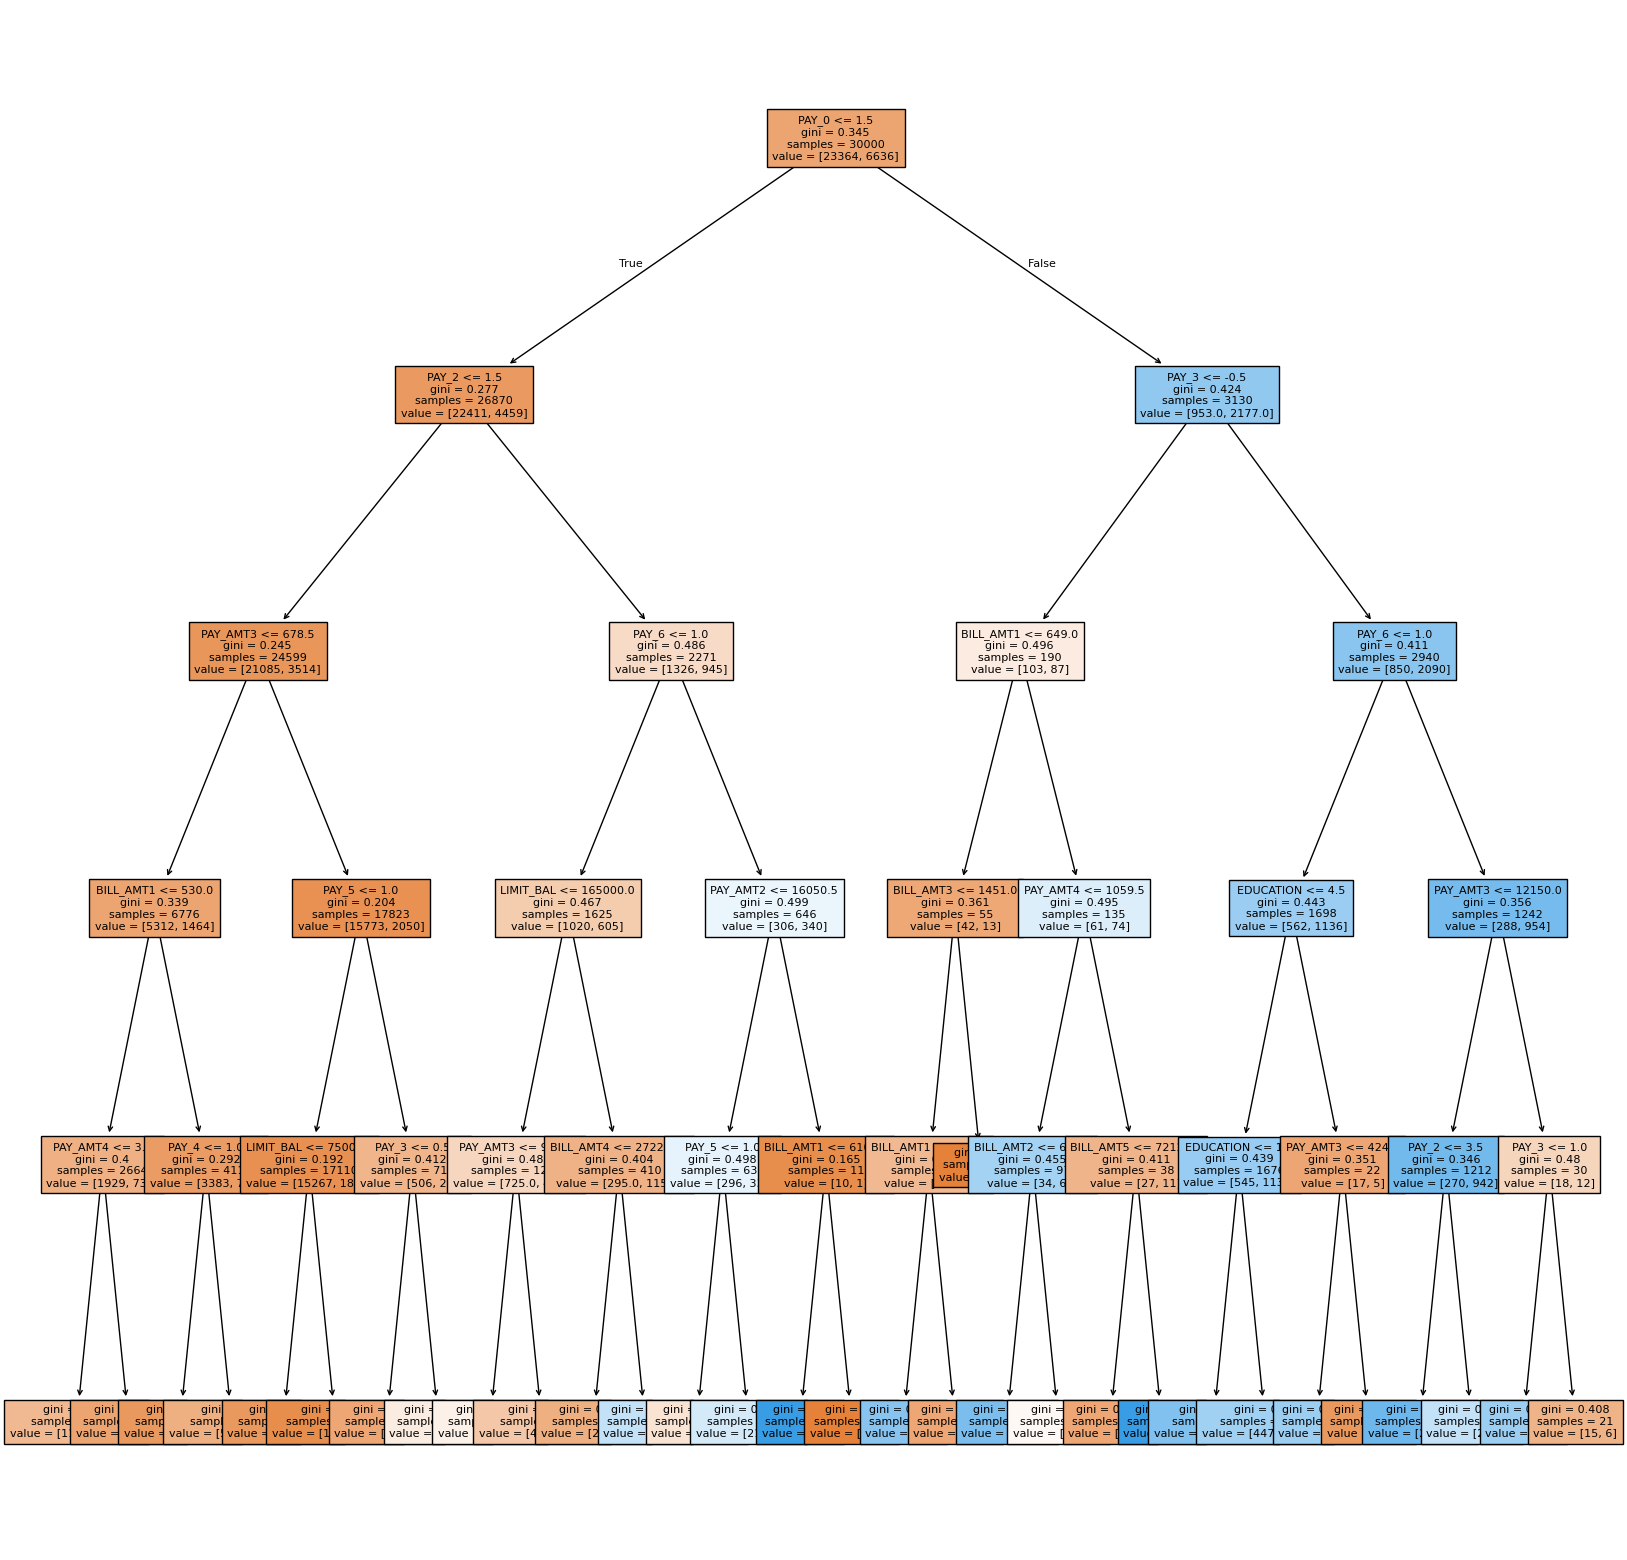

In [41]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(tree2, feature_names=list(X.columns), filled=True, ax = ax, fontsize=8);